# LAB | Titanic exploration

## Import libraries here

In [1]:
# Your code here

In [2]:
# !pip install -U scikit-learn

In [3]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Titanic dataset

- Read the file `titanic.csv` and store in a variable called `titanic`
- You can find more information [here](https://www.kaggle.com/c/titanic/data)

In [4]:
# Your code here

In [5]:
titanic = pd.read_csv("data/titanic.csv")

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Drop the `Cabin` column for now
- The problem with the Cabin column is it has a lot of missing values. We'll see how to handle it later.

In [7]:
# Your code here

In [8]:
# your code here
titanic.drop("Cabin",axis=1, inplace=True)

## Missing values
- Count the number of missing values on the dataset
- After counting the number of missing values, drop them. We'll come back to them later.

In [9]:
# Your code here

In [10]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

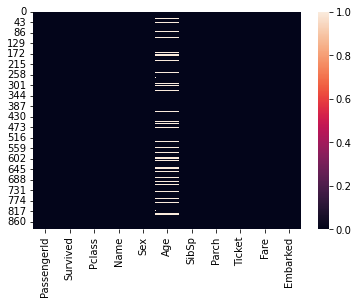

In [11]:
sns.heatmap(titanic.isna())

In [12]:
titanic.shape

(891, 11)

In [13]:
titanic.dropna(inplace=True)

- Check how much data we've dropped and check the number of missings in the dataset again just to check if you dropped it correctly.

In [14]:
# Your code here

In [15]:
titanic.shape
# we dropped 179 lines

(712, 11)

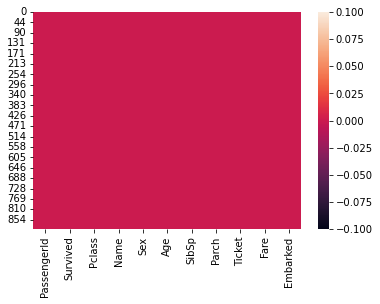

In [16]:
sns.heatmap(titanic.isna())

## Check some statistics of the dataset
- Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [17]:
# Your code here

In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


- What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

In [19]:
# Your answer here

In [20]:
#It looks like we have a little less survivors, and our age range goes from babies to elders

## Visualizing relationships
- Try to use a scatterplot on the dataframe columns `Age` vs `Survived` to see if you can have some insights

In [21]:
# Your code here

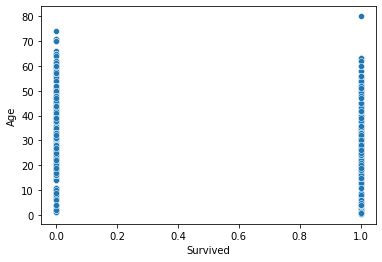

In [22]:
sns.scatterplot(x='Survived',y='Age',data=titanic);
#it seems to be evenly distributed with fewer higher ages in the number 1 survival

- Now do the same for the columns `Fare` and `Survived`

In [23]:
# Your code here

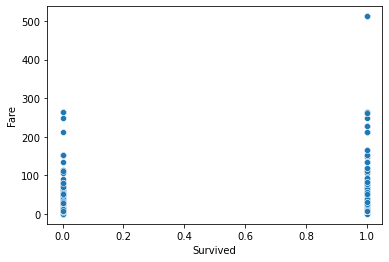

In [24]:
sns.scatterplot(x='Survived',y='Fare', data=titanic);
# they also seem to be similar except for the fact that the richest 

## Dealing with categorical variables
- Is there any better visualization technique to handle with categorical variables? Find other ways and try to understand the effect of Age in the variable Survived

In [25]:
# Your code here

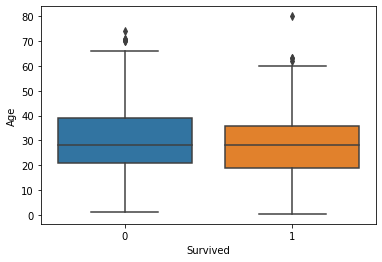

In [26]:
sns.boxplot(x='Survived',y='Age',data=titanic);

## Cross Tab
- Sometimes the plots above can reveal some important insights - especially  if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` function. 
- Use it to explore the relations between `Age` and `Survived`. 

In [27]:
# Your code here

In [28]:
pd.crosstab(titanic["Age"],titanic["Survived"])

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


- Now perform the same operation for `Pclass` and `Survived`

In [29]:
# Your code here

In [30]:
pd.crosstab(titanic["Pclass"],titanic["Survived"])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


## Correlations
- Use the method `.corr()` in your dataframe to understand the correlation between the variables

In [31]:
# Your code here

In [32]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


- Plot a heatmap with the correlation values

In [33]:
# Your code here

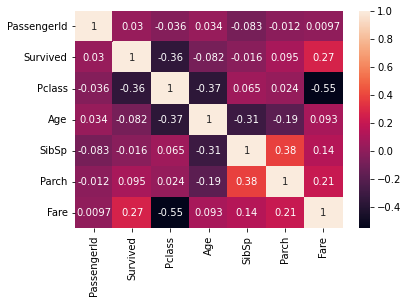

In [34]:
sns.heatmap(titanic.corr(),annot=True);

- Do you think age is linearly related to the variable Survived? 
- Do you think this variable will be important in our models?

In [35]:
# Your answer here

In [36]:
# Considering the value of -0.082 there seems to be no linear correlation between age and survival

## Plots
- Plot the distribution of the `Age` variable for each category of the `Survived` variable in the same plot. 

In [37]:
# Your code here

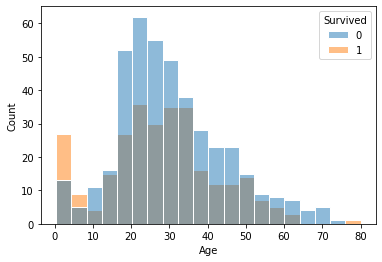

In [38]:
sns.histplot(data=titanic, x="Age", hue="Survived",edgecolor='white');

- Plot the `Age` distributions but break it into the groups:
> - Survived, less than 18 years old male 
> - NOT Survived, less than 18 years old male 
 

In [39]:
# Your code here

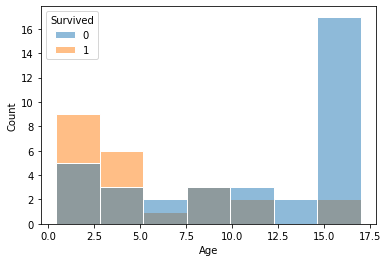

In [40]:
sns.histplot(data=titanic[(titanic["Age"]<18)&(titanic["Sex"]=="male")], 
             x="Age", hue="Survived",edgecolor='white');

- What can you conclude about the variable Age? 
- Is it important? 
- How does this relate to `Age`'s linear correlation coefficient? 

In [41]:
# Your answer here

In [42]:
# if we separate by gender the age becames relavant, there may be a linear correlation if we filter the data in different groups

## Average survival rate
- You probably observed a discrimination of surivaval around 9 years old. 
- For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

> - Males with ages less than 9
> - Males with ages greater than 9 and less than 18

- What are their average survival?

In [43]:
# Your code here

In [44]:
print("the first group average survival is ",np.mean(titanic[(titanic["Sex"]=="male") & (titanic["Age"]<9)]["Survived"]))
print("the first group average survival is ",np.mean(titanic[(titanic["Sex"]=="male") & (titanic["Age"]>9) & (titanic["Age"]<18)]["Survived"]))

the first group average survival is  0.6071428571428571
the first group average survival is  0.15384615384615385


## Prepare data for our first model

### Let's start simple. 
- First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`

In [45]:
# Your code here

In [46]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

- Also create a pandas series containing the variable `Survived`. Store it in the variable `y`.

In [47]:
# Your code here

In [48]:
y = titanic["Survived"]

## Dummify your dataset
- Create a dummy version of your `X` dataset. 
- After obtaining the dummification of your features, you'll observe that you won't need both of them, so you could use the argument `drop_first=True` to get rid of the first dummy.

In [49]:
# Your code here

In [50]:
X_dummy=pd.get_dummies(X,drop_first=True)

## Prepare your validation strategy
- We will use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on data you haven't seen before. 
- So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your dataset

- Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Also create a pandas series containing `y_train` and `y_test`. 
- You can use `train_test_split` to split
```python
from sklearn.model_selection import train_test_split
```

In [51]:
# Your code here

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy,y)

## Concatenate
- Concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. 
- Put them into dataframes called `titanic_train` and `titanic_test`

In [54]:
# Your code here

In [55]:
titanic_train = pd.concat([X_train,y_train],axis=1)
titanic_test = pd.concat([X_test,y_test],axis=1)

## Store it in your own folder.

In [56]:
# Your code here

In [57]:
titanic_train.to_csv('titanic_train.csv', index=False)
titanic_test.to_csv('titanic_test.csv', index=False)